# Project: Medical Appointment No-Show Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
    <h4>Dataset Features:</h4>
    <li><b>PatientId</b> - Patient Identification Number.</li>
    <li><b>AppointmentID</b> - Identification of a patient's appointment</li>
    <li><b>Gender</b> - Male or Female.</li>
    <li><b>ScheduledDay</b> - The day the patient is due to see a doctor.</li>
    <li><b>AppointmentDay</b>- The day a patient's appointment is set.</li>
    <li><b>Age</b> - How old the patient is.</li>
    <li><b>Neighbourhood</b> - Where the hospital is located.</li>
    <li><b>Scholarship</b> - True of False - whether or not a patient is enrolled in a Brasilian welfare program, Bolsa Familia. </li>
    <li><b>Hipertension</b> - True or False</li>
    <li><b>Diabetes</b> - True or False. True if a patient is diabetic and false if a patient is not</li>
    <li><b>Alcoholism</b> - True or False</li>
    <li><b>Handcap</b> - True or False. True if a patient is handicapped and False if not.</li>
    <li><b>SMS_received</b> - True or False. True if a patient receives an sms and false if a patient does not.</li>
    <li><b>No-show</b> - Yes or No. Yes if a patient does not show up and No if a patient shows up</li>


### Question(s) for Analysis
<h4> We will be exploring the following questions in our analyses</h4>

>1. Which gender has the most scheduled appointments? 
>2. Which gender shows up more on their appointment days?
>3. Does age affect the chances of showing up?
>4. How does the gap in schedules (due_days) affect a patient's chance of showing up for their appointment?
>5. Do patients who receive sms show up more than those who do not?
>6. Do patients on scholarship show up for their appointments more than those who are not?
>7. Does a patient's handicap affect their chances of showing up?
>8. Do patients with a particular disease show up more than those without?
>9. Which months recorded the highest appointment, and what was the patients' turn-up for those months?
>10. What is the distribution of appointment schedules for each neighbourhood?


**Dataset used for the analyses** <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"> click here to download </a>

In [1]:
# Importing all the libraries for the analyses.

import pandas as pd # for creating and manipulating our dataframe
import numpy as np # for numerical computations
import datetime as dt # For working on date features

# for plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# magic word to ensure all plots are within the notebook
%matplotlib inline 

In [2]:
# Setting global variables for palette and figure size
fig_size = (10,8)
palette = ['#f4b41a', '#143d59']

In [3]:
# Function for the bar plots
def bar_plot(x_data, df_data, hue_value, x_label, y_label,title):
    
#   setting the size of the plot.
    fig_size = (10,8)
    plt.figure(figsize=(fig_size))
    
#   setting the colors of the palette
    palette_value = ['#f4b41a', '#143d59']
    
#   Creating the plot
    sns.countplot(x = x_data, data=df_data, hue=hue_value, palette=palette_value)
    
#   Setting the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [4]:
# Function to plot our pie charts
def pie_plot(data, label_names, title, explode_value ):
    
#   Setting the arguments of the plt.pie() method
    radius_value = 1.8
    shadow_value = False
    
#   Setting the explode_value with a condition.
#   Since the proportion of our pies will differ in count, we need a condition to accommodate the explode argument for any size.
    if explode_value is False:
        explode_value=(0,0.05)
    else:
        explode_value = explode_value
        
#   Making sure our labels are accurate
    label_names = data.index
    
#   Setting the text properties  
    textprops_value = {'fontsize': 20, 'color': '#d52027', 'weight': 'bold'}
    
#   Setting the wedge properties
    wedgeprops_value = {'edgecolor': '#ffffff', 'linewidth': 1}
    
#   Setting the label_distance and pctdistance
    label_distance = (1.50)
    pctdistance_value = (1.22)
    
#   Setting the colors of the pies
    colors = ['#f4b41a', '#143d59', '#d62828'] 
    
#   Plotting the chart
    plt.pie(data, radius=radius_value, explode=explode_value, wedgeprops=wedgeprops_value, textprops=textprops_value, \
           colors = colors, pctdistance=pctdistance_value, shadow=shadow_value,autopct='%0.2f%%',\
            labels= label_names, startangle=0, labeldistance=label_distance)
    
#   Setting the title of the chart
    plt.title(title + '\n\n\n\n\n\n\n\n\n')


<a id='wrangling'></a>
## Data Wrangling

#### Here, we will:
> 1. Load our dataset. Our dataset will be loaded into **original_data** variable, but we will perform our analyses on the copy of the dataset named **"df"**.
> 2. Use the describe() function to get the summary statistics of our dataset in order to gain insights on the characteristics of our features.
>3. Check for inconsistencies in our dataset.

<h3>1. Loading the dataset. </h3> 

In [5]:
# Loading the dataset for analysis
#The variable name for the dataset will be "df"

# Creating our original dataset
original_data = pd.read_csv('noshowappointments_2016.csv') 

# Making a copy of the original data
df = original_data.copy() 

In [6]:
# Viewing the shape of our dataset. i.e. the number of entries and columns
df.shape 

(110527, 14)

> The shape output above shows that our dataset has 110,527 entries and 14 columns

<h3>2. Creating Summary Statistics to gain insights</h3> 

In [7]:
# Summary Statistics of the dataset to get some insights on the characteristics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the summary statistics above: 
    <li>Majority of the ages fall between 37 and 55 years</li>
    <li>it seems we have some ages that are less than 0. </li>


<h3>3. Checking for null values, duplicates, and outliers</h3>

>We will check for null values and duplicated values.
It's important to do this in order for us to ascertain the level of missing and duplicated values in each 
column which might impact our analyses.

In [8]:
#Checking for null values in the dataset
null_values = df.isnull().sum().sum()
print('Number of Null Values: {}'.format(null_values))

Number of Null Values: 0


In [9]:
#Checking if there are duplicate values
duplicates = df.duplicated().sum()
print('Number of duplicates: {}'.format(duplicates))

Number of duplicates: 0


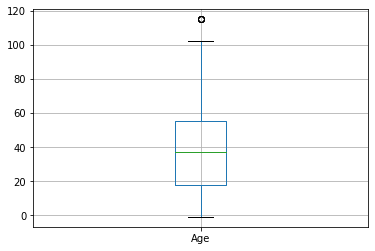

In [10]:
# Checking for Outliers in the age column using a boxplot.

df.boxplot(column = ['Age']);

<h3>4. Checking for inconsistencies in our columns </h3>

In [11]:
# Checking for the number of unique values in each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
#checking for ages less than 0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#checking for any relationship between gender and no-show rate
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

### Summary of Data Wrangling 
> <li>There are 110,527 entries and 14 columns.</li>
> <li>Majority of the ages fall between 37 and 55 years.</li>
> <li>We have an age that is less than 0. We will have to drop that row because age cannot be less than 0.</li>
> <li>There are more Female patients than Male.</li>
> <li>We have an outlier in the age. Although this is rare, for the purpose of this analysis, we will assume some patients are of that age.</li>
> <li>We have more females showing up for their appointments than males. This is subject to further analyses</li>



## Data Cleaning
> In this section, we will be cleaning the dataset to make it fit for analyses. We will achieve this by:
> 1. Handling null values.
> 2. Adjusting inconsistent values.
> 3. Dropping some rows and columns that will not be relevant to our analyses.
> 4. Adding more columns where necessary.
> 5. Formatting the datatypes of some columns.

<h3> 1. Formatting the Date Columns (AppointmentDay and ScheduledDay) </h3>

In [14]:
# Converting the scheduled day and appointment day to date format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [15]:
# Extracting only the date and discarding the time 
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

<h3> 2. Creating a column to show the gap between the AppointmentDay and SchduledDay</h3>

> We will be using this column to analyse whether days_gap affected patients chances of showing up.

<h4>2.1 Finding the days_gap</h4>

In [16]:
# Finding the day's gap between when the appointment was scheduled and the appointment date.
df['days_gap'] = df['AppointmentDay'] - df['ScheduledDay']


In [17]:
# Converting the days gap to integer
df['days_gap'] = df['days_gap'].dt.days

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  days_gap        110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


In [19]:
# Finding insights from the days_gap
df.days_gap.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_gap, dtype: float64

<h4> 2.2 Checking for the days_gap inconsistency</h4>

In [20]:
# Finding days gap that are less than 0
df.query('days_gap < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_gap
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


>From the summary statistics above, we have some negative values. Looking at the dataset, it's not logical to have appointment dates ealier than scheduled dates. 
This irregularity is what led to the negative values. So, for the purpose of our analysis, we will drop all such rows.

In [21]:
# Dropping rows that have days_gap less than 0
df.drop(df[df['days_gap']<0].index, inplace=True)

In [22]:
# To confirm we dropped all rows with days_gap less than 0
df.days_gap.describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_gap, dtype: float64

In [23]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_gap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<h3> 3. Dropping columns that are not relevant to our analyses</h3>

> From the analyses so far, the columns, 'PatientId', 'AppointmentID' are not relevant to our analyses and so will be dropped.

In [24]:
# Dropping the two irrelevant columns. inplace argument ensures the change occurs on the df

df.drop(columns= (['PatientId', 'AppointmentID']), inplace=True) 

In [25]:
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_gap
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0


<h3>4. Changing the format of the entire columns for consistency, and also renaming some mispelled columns. </h3> 

In [26]:
# Replacing all '-' with underscore (_)
df.rename(columns = (lambda x: x.replace('-','_')), inplace = True)

In [27]:
# Setting all the colummns to lower case for consistency
df.columns = map(str.lower,df.columns) 

In [28]:
# To confirm all our columns are affected.
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show', 'days_gap'],
      dtype='object')

In [29]:
#Renaming mispelled columns.
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace = True)

In [30]:
# Confirming that our changes were effected
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


<h3>5. Dropping the ages that are less than zero</h3>

> During the data wrangling process, it was discovered that one patient's age was less than zero.
Considering this dataset, we can infer that no patient's age should be less than zero. The reason is that a patient who is scheduled for an appointment must have lived for some time prior to the scheduled date or at lease born that day. For this reason, we will drop the age rows that are less than 0.

In [31]:
# Summary statistics of patients' ages
df['age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [32]:
# finding rows with age less than 0
df.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [33]:
# Dropping rows with age less than 0
df = df[df['age']>=0]

In [34]:
# Checking the summary statistics of the age column to confirm our changes were effected
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<h3>6. Checking the unique values of scholarship, hypertention, diabetes, handicap and sms_received columns</h3>

In [35]:
# Checking the unique values of some columns
df[['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received']].nunique()

scholarship     2
hypertension    2
diabetes        2
alcoholism      2
handicap        5
sms_received    2
dtype: int64

From the output above, handicap has more than 2 unique values and this is inconsistent with what we should get, so we have to replace the values that are greater than 1. The idea here is that since it has a value greater than 0, then it should've been 1 since we expect only two outcomes for the columns: either the patient is handicapped or not.

In [36]:
# Finding rows that have handicap greater than 1
df.query('handicap >1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap
946,M,2016-04-14,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No,15
1665,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No,30
1666,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No,30
2071,M,2016-04-29,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No,0
2091,F,2016-04-29,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01,2016-06-07,44,ROMÃO,0,1,1,0,2,1,No,6
109484,M,2016-05-31,2016-06-02,64,DA PENHA,0,1,1,0,2,0,No,2
109733,F,2016-06-03,2016-06-07,34,JUCUTUQUARA,0,0,0,0,2,1,No,4
109975,M,2016-06-02,2016-06-06,39,PRAIA DO SUÁ,1,0,0,0,2,1,No,4


In [37]:
# Replacing the values greater than 1 with 1.
df.loc[df.handicap >1, 'handicap'] = 1

In [38]:
# Confirming that our changes were effected
df.query('handicap > 1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap


<h3>7. Formatting the Datatypes of some columns:</h3>

<li> no_show to 0 and 1 </li>
<li> scholarship, hypertension, diabetes, alcoholism, handicap, sms_received, and no_show to boolean </li>
<li> Gender to category </li>

In [39]:
# setting no_show to  1 and 0 (0 if a patient showed up and 1 if a patient did not show up)
df.loc[df.no_show == 'No', 'no_show'] = 0
df.loc[df.no_show == 'Yes', 'no_show'] = 1

In [40]:
# converting the scholarship, hypertension, diabetes, alcoholism, handicap, sms_received, and no_show to boolean

# List of columns to change their datatypes
bool_cols = ['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received', 'no_show']

# Conversion proper
df[bool_cols] = df[bool_cols].astype('bool')

In [41]:
# Confirming the datatypes of the affected columns
df[bool_cols].dtypes

scholarship     bool
hypertension    bool
diabetes        bool
alcoholism      bool
handicap        bool
sms_received    bool
no_show         bool
dtype: object

In [42]:
# Converting gender to category
df.gender.astype('category');

In [43]:
# Confirming our changes were effected.
df.gender.dtypes

dtype('O')

In [44]:
# Checking the properties of the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110521 non-null  object
 1   scheduledday    110521 non-null  object
 2   appointmentday  110521 non-null  object
 3   age             110521 non-null  int64 
 4   neighbourhood   110521 non-null  object
 5   scholarship     110521 non-null  bool  
 6   hypertension    110521 non-null  bool  
 7   diabetes        110521 non-null  bool  
 8   alcoholism      110521 non-null  bool  
 9   handicap        110521 non-null  bool  
 10  sms_received    110521 non-null  bool  
 11  no_show         110521 non-null  bool  
 12  days_gap        110521 non-null  int64 
dtypes: bool(7), int64(2), object(4)
memory usage: 6.6+ MB


### Summary of Data Cleaning 

> <li>The appointmentday and scheduledday were converted to dates.</li>
> <li>days_gap column was added to the dataset to help us calculate whether or not it affected patients' chances of showing up.</li>
> <li>We dropped ages that were less than 0. This is because it's illogical to have any age less than 0. </li>
> <li>We dropped the patientid and appointmentid columns because they would not be relevant to our analyses.</li>
> <li>We formatted the column headers for consistency.</li>
> <li>The gender was converted to a categroical variable.</li>
> <li>All other columns that had two outcomes were converted to boolean datatype.</li>
> <li>We now have 110,521 entires and 13 columns.</li>

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we will be computing the statistics of our dataset and creating visualizations to answer the following questions:
>1. Which gender had the most scheduled appointments? 
>2. Which gender showed up more on their appointment days?
>3. Does age affect the chances of showing up?
>4. How does the gap in schedules (due_days) affect a patient's chance of showing up for their appointment?
>5. Do patients who receive sms show up more than those who do not?
>6. Do patients on scholarship show up for their appointments more than those who are not?
>7. Do patients who are handicapped show up more than those who are not?
>8. Do patients with a particular disease show up more than those without?
>9. Which months recorded the highest appointment, and what was the patients' turn-up for those months?
>10. What is the distribution of appointment schedules for each neighbourhood?

> **NB:** For the **NO-SHOW** column, **FALSE** means a patient showed up while **TRUE** means a patient did not show up. 

In [45]:
# Making a copy of our cleaned dataset
df_new = df.copy()

### Research Question 1: Which Gender had the most scheduled appointments?

''

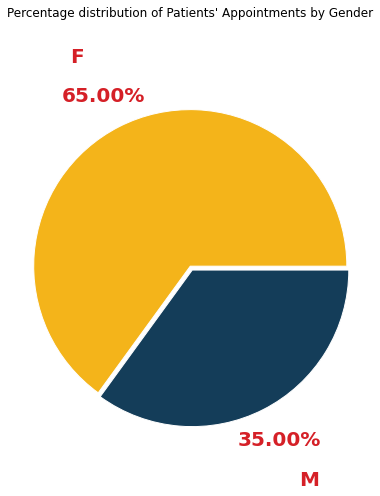

In [46]:
# def pie_plot(data, label_names, title )
pie_plot(df_new['gender'].value_counts(), df_new['gender'].unique(), \
         'Percentage distribution of Patients\' Appointments by Gender', explode_value=False)
;

>The pie chart clearly shows that about **65%** of the total appointments were **Females** while only **35%** were **Male**.

### Research Question 2: Which gender showed up more on their appointment days?

In [47]:
# Grouping by gender and no_show to see the proportion
df_new.groupby('gender')['no_show'].value_counts()

gender  no_show
F       False      57245
        True       14591
M       False      30962
        True        7723
Name: no_show, dtype: int64

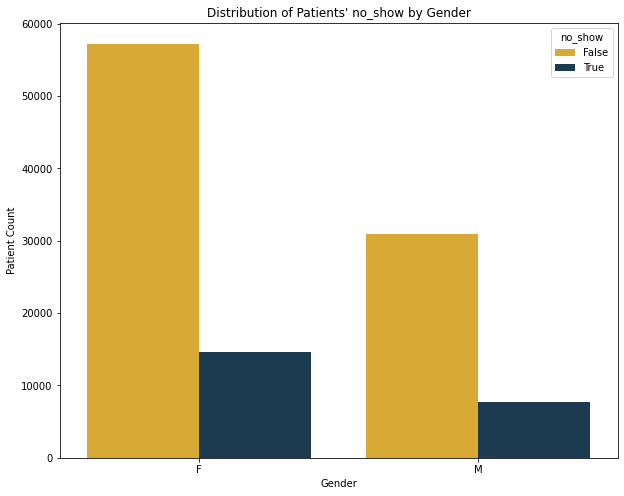

In [48]:
# Here we will compare the gender with no_show with a bar plot using our bar_plot function

# bar_plot(x_data, df_data, hue_value, palette_value, x_label, y_label,title)
bar_plot('gender', df_new, 'no_show', 'Gender', 'Patient Count','Distribution of Patients\' no_show by Gender')

The output above reveals that more women showed up for their appointments than men.

### Research Question 3: Does age affect the chances of showing up?

> In order to find the distribution of the ages in relation to their no_show chances, we will group the ages into categories.
    <li>The age groups will be: child, young_adult, middle_age_adult, and old_adult</li>

In [49]:
# Creating bins for grouping the ages
df_age_bin = df_new.age.describe()

In [50]:
# setting the bins for the ages.
bins = [df_age_bin['min'], df_age_bin['25%'], df_age_bin['50%'], df_age_bin['75%'], df_age_bin['max']]
bin_labels = ['child', 'young_adult', 'middle_age_adult', 'old_adult']

In [51]:
# creating a copy of our new dataset to add the age bins
df_age = df_new.copy()
df_age['age_labels'] = pd.cut(df_age['age'], bins, labels= bin_labels)

In [52]:
# Viewing the df_age dataframe
df_age.head(4)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap,age_labels
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,0,old_adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,0,old_adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,0,old_adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0,child


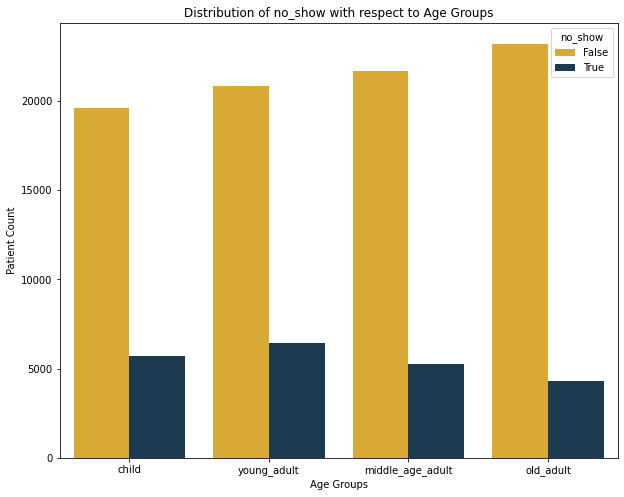

In [53]:
# Plotting no_show with respect to age groups
# bar_plot(x_data, df_data, hue_value, x_label, y_label,title)
bar_plot('age_labels', df_age, 'no_show', 'Age Groups', 'Patient Count', 'Distribution of no_show with respect to Age Groups')

> We can conlcude that older patients have higher chances of showing up than the younger ones. This means that the older the patient, the higher the chance of showing up.

In [54]:
df_new.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,0


### Research Question 4: How does the gap in schedules (due_days) affect a patient's chance of showing up for their appointment?

> In order to find the distribution of the ages in relation to their no_show chances, we will group the ages into categories.
    <li>The age groups will be: child, youg_adult, middle_age_adult, and old_adult</li>

''

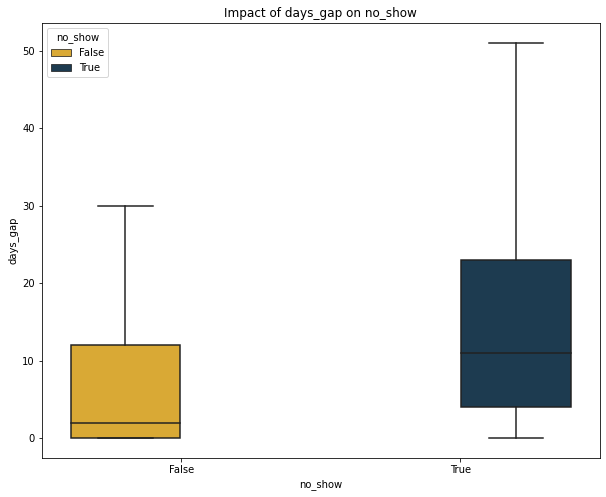

In [55]:
# We will create a boxplot to show the how the days_gap affected no_show

# Setting the chart size
plt.figure(figsize=(fig_size))

# Plotting the chart
sns.boxplot(x='no_show', y ='days_gap', showfliers = False, data = df_new,palette = palette, hue='no_show')

# Adding chart title
plt.title('Impact of days_gap on no_show')
;

> We can say that patients that had shorter days_gap showed up more than those with longer days_gap.
Most of the patients that showed up had days gap between 0 and 30.

### Research Question 5: Do patients who receive sms show up more than those who do not?

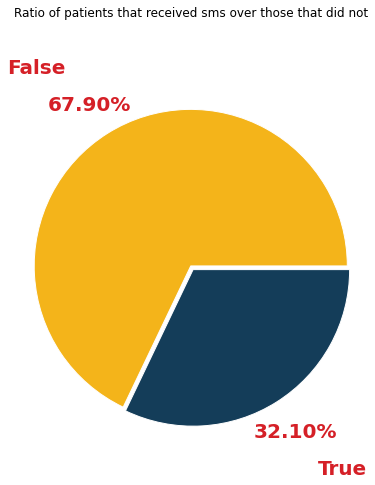

In [56]:
# Checking the proportion of of patients that received sms over those that did not

pie_plot(df_new['sms_received'].value_counts(), df_new['sms_received'].unique(), \
         'Ratio of patients that received sms over those that did not', explode_value=False)

> About 68% of the patients did not receive sms.

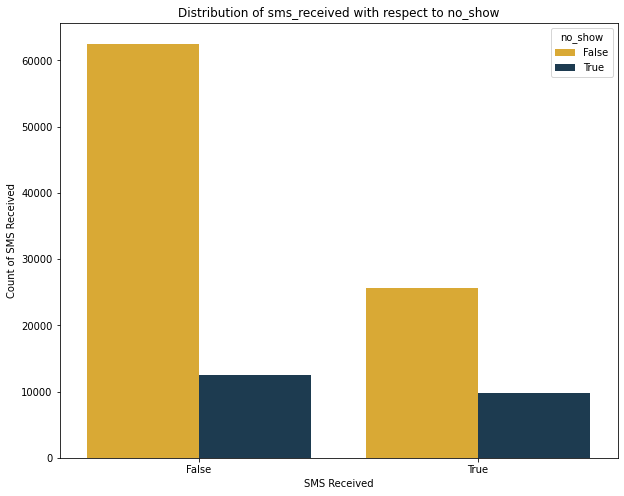

In [57]:
# Plotting the no_show distribution with respect to sms_received

# bar_plot(x_data, df_data, hue_value, x_label, y_label,title)
bar_plot('sms_received', df_new, 'no_show', 'SMS Received', 'Count of SMS Received',\
         'Distribution of sms_received with respect to no_show')

> From the above plot, we can conclude that majority of the patients that received sms did not show up for their appointments. This is quiet strange as one would obviously think that a reminder would increase the chances of a patient showing up. 
From this, we can conclude that the problem is not that the patients actually forgot their appointments.

## Research Question 6: Do patients on scholarship show up for their appointments more than those who are not?

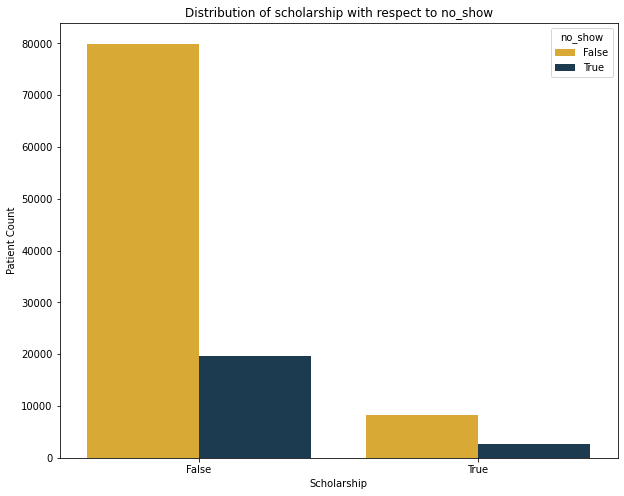

In [58]:
# Plotting the no_show value with respect to scholarship 

# bar_plot(x_data, df_data, hue_value, x_label, y_label,title)
bar_plot('scholarship', df_new, 'no_show', 'Scholarship', 'Patient Count','Distribution of scholarship with respect to no_show')

> The plot above shows that patients that were not on scholarship showed up more for their appointments than those that were. This is expected because patients who paid for themselves would value their appointments more than those who did not.

# Research Question 7: Do patients who are handicapped show up more than those who are not?

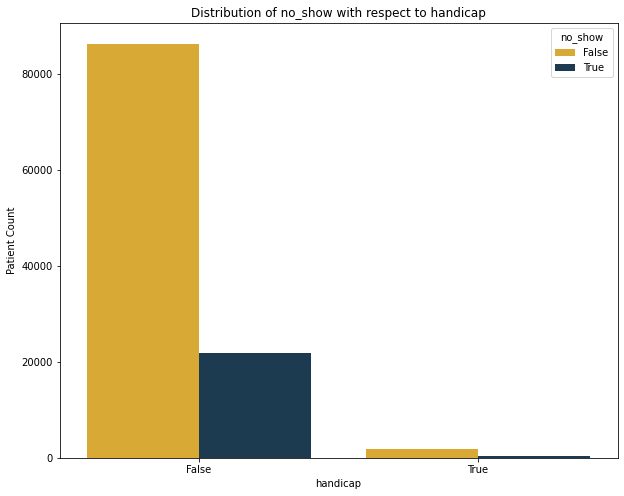

In [59]:
# Plotting the distribution of no_show with respect to handicap

# bar_plot(x_data, df_data, hue_value, x_label, y_label,title)
bar_plot('handicap', df_new, 'no_show', 'handicap', 'Patient Count', \
        'Distribution of no_show with respect to handicap')

> We can say that majority of handicapped patients were not able to show up. This can be understood because, chances are that those patients didn't have someone to assist them get to the hospital on their respective appointment days.

# Research Question 8: Do patients with a particular disease show up more than those without?

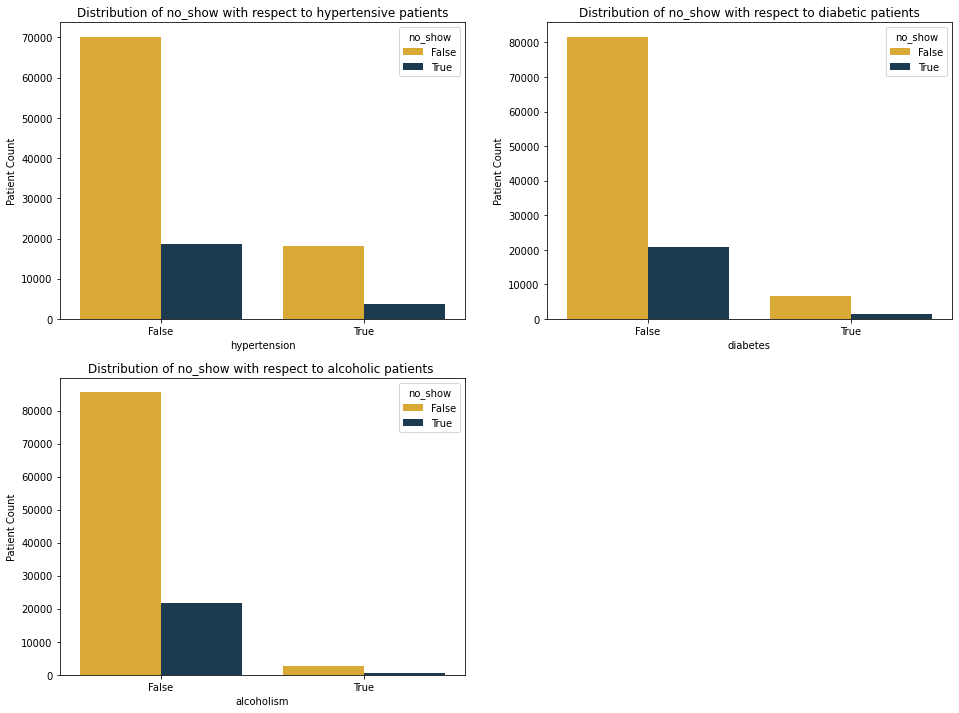

In [60]:
# Plotting no_show against diseases

plt.figure(figsize=(16,12))

# Plotting the hypertension chart
plt.subplot(2,2,1)
sns.countplot(x='hypertension', data=df_new, hue='no_show', palette = palette)
# Title of the hypertension chart
plt.title('Distribution of no_show with respect to hypertensive patients')
plt.ylabel('Patient Count')

# Plotting the diabetes chart
plt.subplot(2,2,2)
sns.countplot(x='diabetes', data=df_new, hue='no_show', palette = palette)

# Title of the diabetes chart
plt.title('Distribution of no_show with respect to diabetic patients')
plt.ylabel('Patient Count')

# Plotting the alchololism chart
plt.subplot(2,2,3)
sns.countplot(x='alcoholism', data=df_new, hue='no_show', palette = palette)

# Title of the alcoholism chart
plt.title('Distribution of no_show with respect to alcoholic patients ')
plt.ylabel('Patient Count');


> The plots above show the following:
    <li>Patients that were not hypertensive showed up more than those that were hypertensive</li>
    <li>Patients that were not diabetic showed up more than those that were diabetic</li>
    <li>Patients that do not take alcohol showed up more than those that take alcohol</li>

# Research Question 9: Which months recorded the highest appointment, and what were the patients' turn-up for those months?

In [61]:
# Adding a month column to investigate the month with highest appointment schedule
df_month = df_new.copy()
df_month['appointment_month'] = pd.to_datetime(df_new['appointmentday']).dt.month_name()

In [62]:
# Confirming our changes
df_month.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_gap,appointment_month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,0,April
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,0,April
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,0,April


In [63]:
# checking the numeric distribution of patient appointments by month
df_month['appointment_month'].value_counts()

May      80836
June     26450
April     3235
Name: appointment_month, dtype: int64

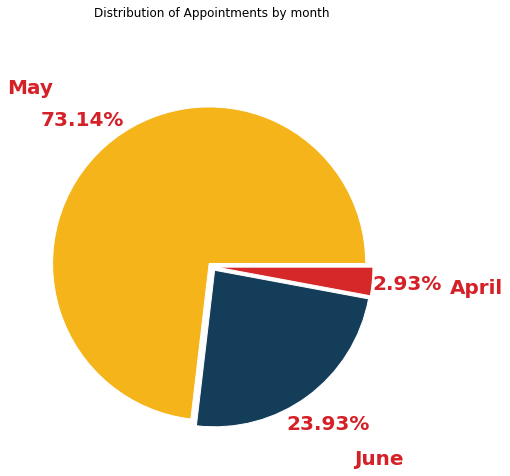

In [64]:


# def pie_plot(data, label_names, title, explode_value):
pie_plot(df_month['appointment_month'].value_counts(), df_month['appointment_month'].unique(),\
         'Distribution of Appointments by month', explode_value=(0.05,0.05,0.05))


> The pie chart above shows that appointment booking was most in May and least in April. This might suggest further questions as to the situations that warrant such occurence.

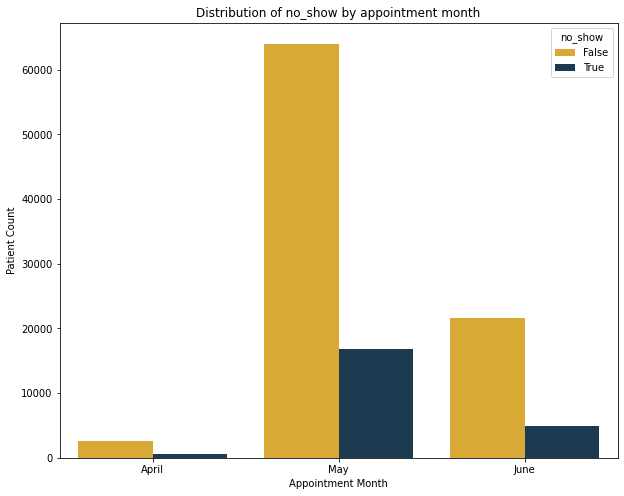

In [65]:

# bar_plot(x_data, df_data, hue_value, x_label, y_label,title)
bar_plot('appointment_month', df_month, 'no_show', 'Appointment Month', \
         'Patient Count','Distribution of no_show by appointment month')

> The plot above shows that majority of the appointments were in May and most of those patients showed up for their appointment

# Research Question 10: What is the distribution of appointment schedules for each neighbourhood?

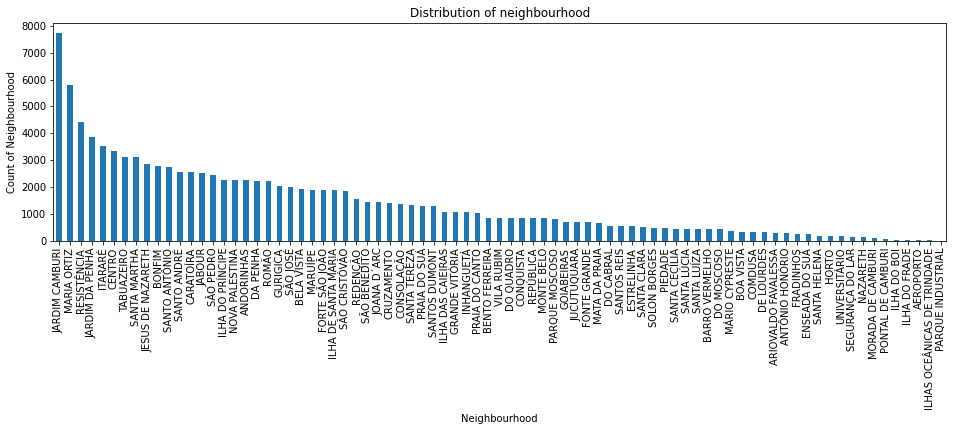

In [66]:
# Plotting the chart
df_new.neighbourhood.value_counts().plot(kind='bar', figsize=(16,4))

# Adding chart title
plt.title('Distribution of neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Neighbourhood');

> The chart above suggests that most of the appointments were scheduled at "JARDIM CAMBURI" Hospital. This could be as a result of proximity or standard.

<a id='conclusions'></a>
## Conclusions

<h3>From our analyses, we can conclude the following:</h3>

> 1. The pie chart clearly shows that about **65%** of the total appointments were **Females** while only **35%** were **Male**.
> 2. More women showed up for their appointments than men. More women appointment schedules could also have impacted this.
> 3. Disease type did not affect patients' turn up.
> 4. Patients that were older showed up more than younger ones.
> 5. Patients that had shorter appointment schedule showed up more than those that had longer appointment schedule. This could be because the patients got better or travelled outside the neighbourhood.
> 6. Patients that were not on scholarship showed up more for their apointments tha those that were not. We can conclude that patients that paid for themselves valued their appointments more than those on scholarship.
> 7. Patients that were handicapped did not turn up much compared to those that were not. This could be because the handicapped patients didn't have someone around to take them to the hospital on their appointment day.
> 8. Most of the appointments were scheduled in **May** while **April** recorded the least schedule. Also, most of the patients that scheduled their appointments in May showed up. Further analyses might reveal the reasons behind the high appointment schedule for a particular month more than others.
> 9. Most of the appointments were scheduled at **JARDIM CAMBURI** Hospital. This could be as a result of proximity, cost of healthcare, or standard of the facility.




### Limitation
> One limitation we have is that we cannot measure how the neighbourhood affected patients' chances of showing up for their appointments. The reason is that we do not have enough information about the patients' addresses and proximity (near or far) to the neighbourhood, the cost of healthcare in the neighbourhoods, and the quality of healthcare.
